Data on [Smart Trash Containers](https://catalog.data.gov/dataset/smart-trash-containers) in the City of Pittsburgh Pennsylvania updated November 30, 2020.

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('data/Smart Trash Containers.csv')
df

container_id  receptacle_model_id      assignment_date  \
0                1                   74  2017-09-14T13:24:40   
1                3                   74  2017-09-14T13:24:40   
2                4                   74  2017-09-14T13:24:40   
3                5                   74  2017-09-19T12:22:45   
4                6                   74  2017-09-19T12:22:46   
...            ...                  ...                  ...   
1208          1335                   74  2021-08-17T09:17:16   
1209          1336                   74  2021-08-17T09:17:16   
1210          1337                   74  2021-08-17T09:17:16   
1211          1338                   74  2021-08-17T09:17:16   
1212          1339                   74  2021-08-17T09:17:16   

        last_updated_date    group_name             address        city  \
0     2021-12-21T00:17:22  1st Division     122 E North Ave  Pittsburgh   
1     2021-12-17T00:29:21  1st Division     1300 Federal St  Pittsburgh   
2     2021-12-21T00:19:42  1st Division      110 Federal St  Pittsburgh   
3     2021-12-21T00:28:32  1st Division     490 E North Ave  Pittsburgh   
4     2021-12-21T00:09:23  1st Division    1501 Brighton Rd  Pittsburgh   
...                   ...           ...                 ...         ...   
1208  2021-12-21T00:19:35  2nd Division  300 Larimer Avenue  Pittsburgh   
1209  2021-12-21T00:07:37  2nd Division    25 Meadow Street  Pittsburgh   
1210  2021-12-21T00:13:41  2nd Division  6525 Meadow Street  Pittsburgh   
1211  2021-12-21T00:15:34  2nd Division  722 Larimer Avenue  Pittsburgh   
1212  2021-12-21T00:04:38  2nd Division   160 Meadow Street  Pittsburgh   

             state    zip          neighborhood  dpw_division  \
0     Pennsylvania  15212     Central Northside           1.0   
1     Pennsylvania  15212     Central Northside           1.0   
2     Pennsylvania  15212      Allegheny Center           1.0   
3     Pennsylvania  15212     Central Northside           1.0   
4     Pennsylvania  15212  California-Kirkbride           1.0   
...            ...    ...                   ...           ...   
1208  Pennsylvania  15206               Larimer           2.0   
1209  Pennsylvania  15206               Larimer           2.0   
1210  Pennsylvania  15206               Larimer           2.0   
1211  Pennsylvania  15206               Larimer           2.0   
1212  Pennsylvania  15206               Larimer           2.0   

      council_district  ward fire_zone          x          y  
0                  1.0  22.0       1-6 -80.004018  40.456073  
1                  1.0  22.0       1-6 -80.006872  40.456625  
2                  1.0  22.0       1-6 -80.006250  40.454520  
3                  1.0  22.0       1-6 -80.002083  40.456444  
4                  6.0  25.0      1-21 -80.015758  40.457025  
...                ...   ...       ...        ...        ...  
1208               9.0  12.0      3-10 -79.915790  40.464430  
1209               9.0  12.0      3-12 -79.914449  40.465254  
1210               9.0  12.0      3-12 -79.910416  40.461669  
1211               9.0  12.0      3-12 -79.910430  40.466880  
1212               9.0  12.0      3-12 -79.912960  40.463790  

[1213 rows x 16 columns]

In [135]:
df.columns

Index(['container_id', 'receptacle_model_id', 'assignment_date',
       'last_updated_date', 'group_name', 'address', 'city', 'state', 'zip',
       'neighborhood', 'dpw_division', 'council_district', 'ward', 'fire_zone',
       'x', 'y'],
      dtype='object')

In [3]:
df.dtypes

container_id             int64
receptacle_model_id      int64
assignment_date         object
last_updated_date       object
group_name              object
address                 object
city                    object
state                   object
zip                      int64
neighborhood            object
dpw_division           float64
council_district       float64
ward                   float64
fire_zone               object
x                      float64
y                      float64
dtype: object

So just getting right into it, most variables make sense right off the bat.  One variable I'm not familiar with is dpw_division but just a basic Google search suggests this means Department of Public Works division.  Looks like x = latitude and y = longitude according to common convention.  I did look at the GeoJSON file available and it does not add any variables that are not already existent in the data we have here.

What types of questions come up when looking at this data?

I think the most prevalent is: "What is a smart trash container?"
- [Resource here](https://pittsburghpa.gov/press-releases/press-releases.html?id=2986)

Next is why do we care about this dataset?
- I'm not really sure yet. We can plot the locations, figure out if certain neighborhoods have more trash cans, figure out which fire zones and wards have the most trash cans. At the end of the day who is this analysis helping?  Let's explore the data and see if more questions emerge and what data we can gather to answer those questions.

Let's just do some EDA and see what happens.

In [5]:
df['assignment_date'] = pd.to_datetime(df['assignment_date'])

In [33]:
print(f"There are {len(df['container_id'].unique()):,} unique containers in this dataset.")

There are 1,213 unique containers in this dataset.


<AxesSubplot:>

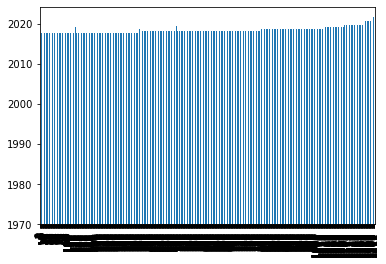

In [10]:
df['assignment_date'].plot(kind='bar')

In [15]:
df['assignment_date'].resample('1Y')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<AxesSubplot:>

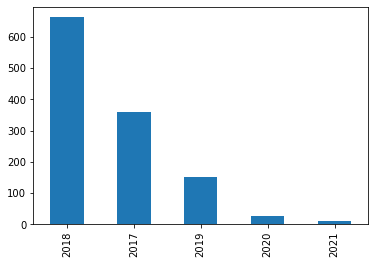

In [19]:
df['assignment_date'].dt.strftime('%Y').value_counts().plot(kind='bar')

<AxesSubplot:>

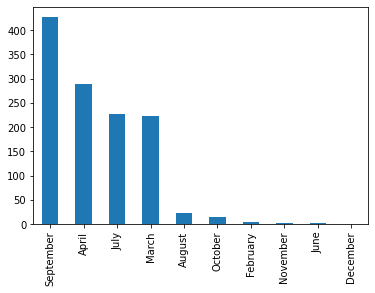

In [22]:
df['assignment_date'].dt.strftime('%B').value_counts().plot(kind='bar')

<AxesSubplot:>

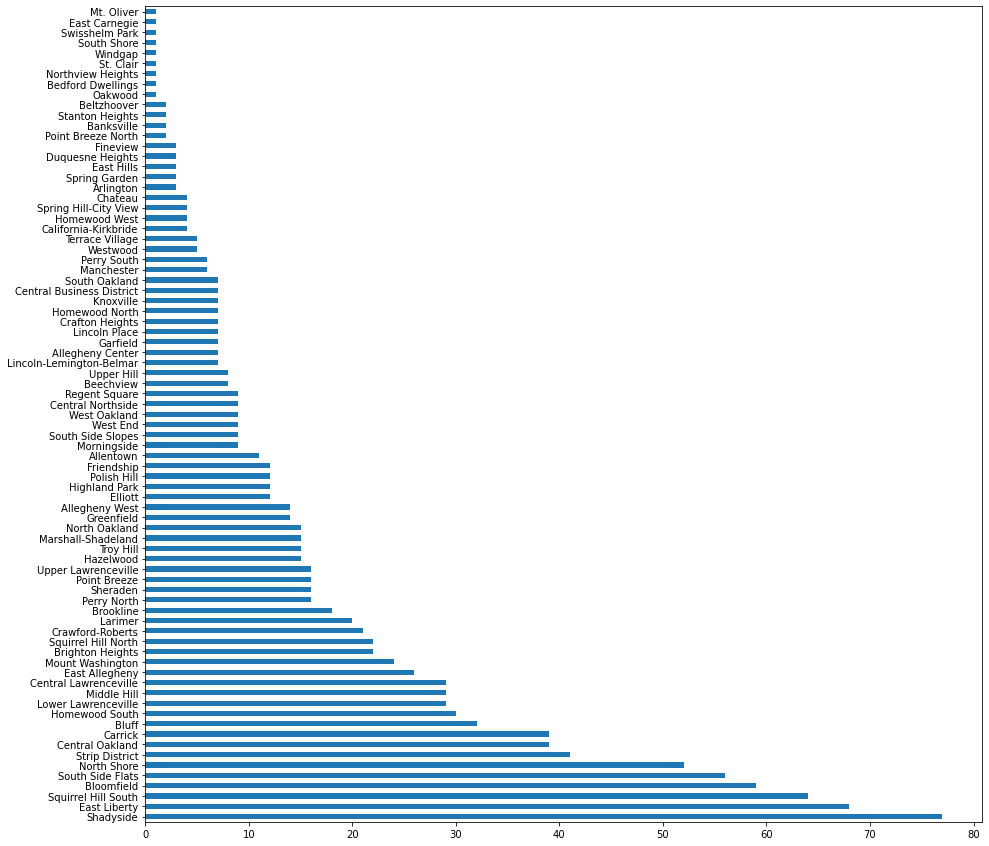

In [26]:
df['neighborhood'].value_counts().plot(kind='barh', figsize=(15, 15))

In [34]:
import folium

In [36]:
containers_map = folium.Map(location=[40.4406, -79.9959], zoom_start=10)
containers_map

In [138]:
records = df[['x', 'y']].to_records()

# This is our map lovingly centered on Dearing Kansas at a zoom of 15
containers_map = containers_map = folium.Map(location=[40.4406, -79.9959], zoom_start=11)
# Add the markers to the map...
for record in records:
    folium.Marker(location=[record[2], record[1]],
                  icon=folium.Icon(color='green', # Outside Color to Season Color
                                   icon_color='white', # Icon Color/Inside Color
                                   icon='trash-o', # What Kind of Icon to Use
                                   prefix='fa', # To use Font Awesome icons
                                   ),
                  # popup=record[4], # Set pop up to the title of the sighting
                  # tooltip=record[5] # Set the tool tip to year of each sighting
                  ).add_to(containers_map)
# Display the map with the marker that's been added
containers_map

In [50]:
from folium.plugins import TimestampedGeoJson
import json

In [142]:
with open('data/smart_trash_containers.geojson') as j:
    data = json.load(j)
data

{'type': 'FeatureCollection',
 'name': 'meuse',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 1,
   'properties': {'container_id': 1,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.35',
    'last_updated_date': '2021-12-22T00:17:24.21',
    'group_name': '1st Division',
    'address': '122 E North Ave',
    'city': 'Pittsburgh',
    'state': 'Pennsylvania',
    'zip': '15212',
    'neighborhood': 'Central Northside',
    'dpw_division': 1,
    'council_district': 1,
    'ward': 22,
    'fire_zone': '1-6'},
   'geometry': {'type': 'Point',
    'coordinates': [-80.0040176155113, 40.456072673964]}},
  {'type': 'Feature',
   'id': 3,
   'properties': {'container_id': 3,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.88',
    'last_updated_date': '2021-12-17T00:29:21.093',
    'group_name': '1st Division',
    'address': '1300 Federal St',
    'city': 'Pi

In [140]:
# This part is to convert the 'assignment_date': '2017-09-14T13:24:40.35'
# According to the documentation:
# - each feature has a ‘times’ property with the same length as the coordinates array.
# - each element of each ‘times’ property is a timestamp in ms since epoch, or in ISO string.
# https://python-visualization.github.io/folium/plugins.html#folium.plugins.TimestampedGeoJson

# So basically I'm creating a new key called 'times' replacing the "T" with " " and stripping the trailing time stamp so the time stamp is in 'YYYY-MM-DD HH:mm:ss' format
# then converting to ISO Format for the TimestampedGeoJson to be able to use it.
# When leaving the feature name as 'assignment_date' the package wouldn't recognize it as a time feature and was getting a "Time not available" error on the map.
# Fix for this inspired by: https://stackoverflow.com/questions/60044777/folium-plugins-timestampedgeojson-time-not-avaliable

from datetime import datetime
for i in range(len(data['features'])):
    # data['features'][i]['properties']['times'] = data['features'][i]['properties'].pop('assignment_date').replace('T', ' ')[:19]
    data['features'][i]['properties']['times'] = [datetime.strptime(data['features'][i]['properties']['assignment_date'].replace('T', ' ')[:19], '%Y-%m-%d %H:%M:%S').isoformat()]
    # data['features'][i]['properties'].pop('last_updated_date')
data#['features'][0]['properties']['assignment_date']

{'type': 'FeatureCollection',
 'name': 'meuse',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 1,
   'properties': {'container_id': 1,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.35',
    'last_updated_date': '2021-12-22T00:17:24.21',
    'group_name': '1st Division',
    'address': '122 E North Ave',
    'city': 'Pittsburgh',
    'state': 'Pennsylvania',
    'zip': '15212',
    'neighborhood': 'Central Northside',
    'dpw_division': 1,
    'council_district': 1,
    'ward': 22,
    'fire_zone': '1-6',
    'times': ['2017-09-14T13:24:40']},
   'geometry': {'type': 'Point',
    'coordinates': [-80.0040176155113, 40.456072673964]}},
  {'type': 'Feature',
   'id': 3,
   'properties': {'container_id': 3,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.88',
    'last_updated_date': '2021-12-17T00:29:21.093',
    'group_name': '1st Division',
    'addres

In [143]:
from datetime import datetime
for i in range(len(data['features'])):
    data['features'][i]['properties']['times'] = [data['features'][i]['properties']['assignment_date'][:19]]

data

{'type': 'FeatureCollection',
 'name': 'meuse',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'id': 1,
   'properties': {'container_id': 1,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.35',
    'last_updated_date': '2021-12-22T00:17:24.21',
    'group_name': '1st Division',
    'address': '122 E North Ave',
    'city': 'Pittsburgh',
    'state': 'Pennsylvania',
    'zip': '15212',
    'neighborhood': 'Central Northside',
    'dpw_division': 1,
    'council_district': 1,
    'ward': 22,
    'fire_zone': '1-6',
    'times': ['2017-09-14T13:24:40']},
   'geometry': {'type': 'Point',
    'coordinates': [-80.0040176155113, 40.456072673964]}},
  {'type': 'Feature',
   'id': 3,
   'properties': {'container_id': 3,
    'receptacle_model_id': 74,
    'assignment_date': '2017-09-14T13:24:40.88',
    'last_updated_date': '2021-12-17T00:29:21.093',
    'group_name': '1st Division',
    'addres

In [120]:
print(datetime.strptime('2017-09-14 13:24:40', '%Y-%m-%d %H:%M:%S'))

2017-09-14 13:24:40


In [97]:
# # data['features']['times'] = data['features'].pop('assignment_date')
# data = str(data).replace('assignment_date', 'times').replace('\'', '\"')
# data = json.loads(data)
# data

'YYYY-MM-DD HH:mm:ss'

In [98]:
# df2 = pd.read_json(data['features'][0])
# df2

In [144]:
containers_map = folium.Map(location=[40.4406, -79.9959], zoom_start=12)
TimestampedGeoJson(data, transition_time=20).add_to(containers_map)
containers_map